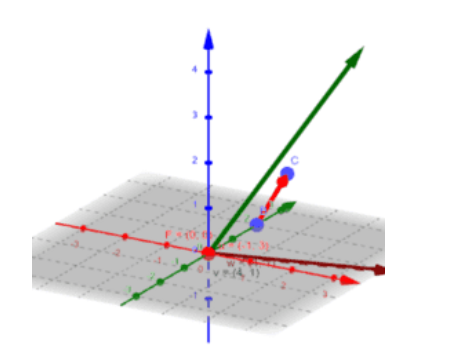


# El algebra lineal 

En algebra lineal, una matriz es una estructura retangular de números dispuestos en filas y columnas. Es la base para resolver ecuaciones lineales, transformaciones y mas.

Para trabajar en algebra lineal usamos el modulo de sipy.linalg y usaremos numpy para crear matrices


# Matriz transpuesta
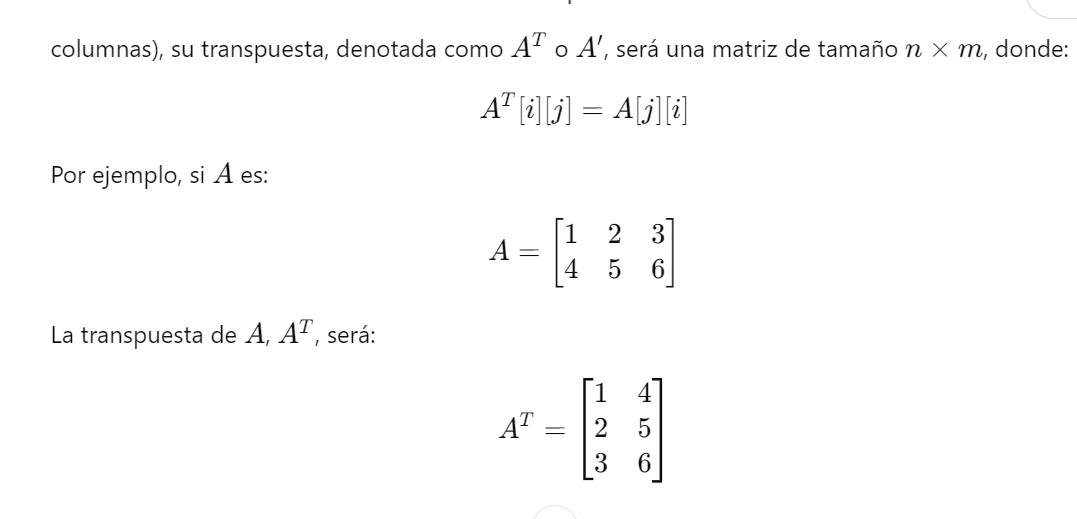

La matriz transpuesta de una matriz A es una nueva matriz que se obtiene al intercambiar las filas y las columnas de  A

Usos de la transpuesta
1. Algebra lineal
   Se utiliza para definir propiedades y operaciones de matrices como el producto escalar de vectores y la simetría de una matriz
   
3. Calculo de matrices invertibles

4. Analisis de datos

5. Resolución de sistemas de ecuaciones

6. Geometría y transformaciones

7. Productos escalares y matrices ortogonales

8. Procesamiento de señales

In [6]:
import numpy as np
from scipy.linalg import solve

In [4]:
A = np.array(
    [[2,3,1],
    [4,7,2],
    [3,6,4]]
)
#Mostramos la matriz y sus propiedades
print("Matriz A")
print(A)
print("Dimenciones de la matriz A", A.shape)
print("Transpuesta de la matriz A")
print(A.T)


Matriz A
[[2 3 1]
 [4 7 2]
 [3 6 4]]
Dimenciones de la matriz A (3, 3)
Transpuesta de la matriz A
[[2 4 3]
 [3 7 6]
 [1 2 4]]


# Resolver sistemas de ecuaciones lineales

## Contexto
Un sistema de ecuaciones lineales tiene la forma Ax = b
### Donde
- A es la matriz de los coeficientes
- x es el vector de incognitas
- b e es el vector de términos independientes

  La solución consiste en encontrar el vector x tal que Ax = b
  Funcion clave scipy.linalg.solve

  ## Entrada
  - A: matriz de los coeficientes
  - b: Vector o matriz de terminos independientes
## Salida
-x: solucion del sistema

problema sea el sistema de ecuaciones
- 3X1 + 1x2 = 9
- 1x1 + 2x2 = 8


In [8]:
#Matriz de coeficientes
A= np.array([[3,1],[1,2]])

#Vector de términos independientes
b = np.array([9,8])
X = solve(A,b)

In [9]:
X

array([2., 3.])

In [10]:
A = np.array([[2,4,6], [1,5,3],[3,2,7]])
b =np.array([18,14,26])
X =solve(A, b)

print("Solución del sistema lineal de ecuaciones")
print(X)

Solución del sistema lineal de ecuaciones
[14.16666667  1.66666667 -2.83333333]


In [28]:
### import numpy as np
from scipy.linalg import solve

def leer_matriz(filas, columnas, nombre="A"):
    print(f"Introduce la matriz {nombre}, fila por fila")
    matriz = []
    for i in range(filas):
        fila = input(f"Ingrese los valores de la fila  {i +1} de la matriz {nombre}, de los coeficientes separado por comas: ")
        matriz.append([float(x) for x in fila.split()])
        
    return np.array(matriz)   

def leer_vector_independiente(tamano, nombre = "b"):
    print(f"Digite el vector de términos independientes {nombre}, separado por espacios")
    vector = input()
    return np.array([float(x) for x in vector.split(" ")])
    
n = int(input("Deme el numero de ecuaciones del sistema "))
A = leer_matriz(n, n, "A")
b = leer_vector_independiente(n, "b")
try:
   X = solve(A,b)
   print("Solución del sistema ")
   print(X)
    
except Exception as e:
    print(f"Error al resolver el sistema {e}")

Deme el numero de ecuaciones del sistema  3


Introduce la matriz A, fila por fila


Ingrese los valores de la fila  1 de la matriz A, de los coeficientes separado por comas:  2 4 6
Ingrese los valores de la fila  2 de la matriz A, de los coeficientes separado por comas:  4 5 6
Ingrese los valores de la fila  3 de la matriz A, de los coeficientes separado por comas:  3 1 -2


Digite el vector de términos independientes b, separado por espacios


 18 24 4


Solución del sistema 
[ 4. -2.  3.]


# Solución de un sistema lineal de ecuaciones
Hemos visto que from scipy.linalg import solve, el método solve nos permite resolver un sistema lineal de ecuaciones de manera eficiente usando la técnica de Descomposición de matrices LU

### Pero podría suceder que nuestro sistema lineal de ecuaciones sea sobrado o subdetreminado

1. Sistema sobrado
   El sistema tiene  más ecuaciones que incognitas, esto ocurre cuando intentamos ajustar un modelo a datos experimentales o resolver un sistema        sobreconstrenido. En tal caso no hay solución exacta Ax=b por que no podemos satisfacer todas las ecuaciones exactamente.

   El metodo de mínimos cuadrados encuentra la solución que minimiza el error cuadrado, es decir la suma de los cuadrados de las diferencias entre las ecuaciones y la solución.
3. Sistema subdeterminado( menos ecuaciones que incognitas)
   El sistema tiene menos ecuaciones que incognitas. Esto sucede cuando tenemos mas variables que ecuaciones. por lo que el sistema tiene infinitas soluciones
   El metodo de mínimos cuadrados encuentra la solución con el menor valor posible de X, es decir , la solución más pequeña en términos de la norma de x, que es generalmente la mas estable.



## ¿Qué hace lstsq?
El método scipy.linalg.lstsq(A, b) resuelve el sistema de ecuaciones Ax=b cuando no hay solución exacta o cuando hay múltiples soluciones.
Busca la solución de mínimos cuadrados, que es aquella que minimiza el error cuadrado ∥Ax−b∥**2 .


## ¿Cómo lo hace?
lstsq utiliza una técnica de descomposición QR para encontrar una solución aproximada al sistema, incluso cuando este no tiene solución exacta o tiene muchas soluciones posibles.

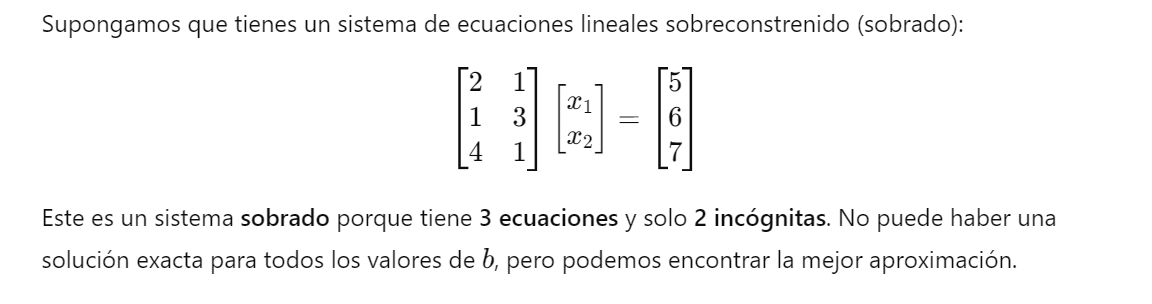

In [35]:
import numpy as np
from scipy.linalg import lstsq

A= np.array([[2,1], [1,3],[4,1]])
b = np.array([5,6,7])
#Solucion 
X, resids, rank, s = lstsq(A,b)
print("Solución mínimos cuadrados: ", X)
#print(X)

# El residuo (error cuadrado) Diferencia entre el valor observado y el ajustado
print("Error cuadrado ", resids)
#print(resids)

print("rank ", rank)
print(rank)

print("s", s)
#printy(s)

Solución mínimos cuadrados:  [1.42666667 1.56      ]
Error cuadrado  0.42666666666666514
rank  2
2
s [5.1279265  2.38838227]


S = [s1, s2]   si S = s1/s2
Numero condicion =s1/s2 
s1 es el valor singular mas grande
s2 es el valor singular mas pequeño 
Para un sistema bien condicionado  el numero de condicion debe ser lo mas cercano a 1 por que indicaría que las direcciones de los datos son igualmente importantes

para calcular el numero de condicion NC=S1/Sr   s1 es el valor singular mas grande y lo divido por el valor singular mas pequeo

 

# Resumen 
- from scipy.linalg import solve
- from scipy.linalg import lstsq

# Matriz identidad
Es la matriz que tiene n filas y n columna, con la diagonal principal de 1 y el resto son ceros

## Propiedades principales
1. Elemento neutro multiplicativo
   - En el contexto de la multiplicación de matrices la matriz identidad actua como el elemento neutro. Es decir, al multiplicar cualquier matriz  A       por In en cualquiera de los lados retorna  la  matriz A.  A*In = A
3. Invarianza del tamaño: Solo podemos multiplicar una matriz In si el tamaño de In es compatible con las dimenciones de A
4. Semejanza a 1 en números reales: La matriz identidad se comporta de manera análoga al número 1 en la multiplicación en numeros reales

## Para que sirve la matriz identidad?
1. Resolución de sistemas lineales de ecuaciones:
   . En métodos como el de eliminación de Gauss o factorización de matrices, la matriz identidad se usa para simplificar el cálculo
# Matrices  Inversas
. La matriz identidad se utiliza para definir la matriz inversa  A<sup>-1<sup>. Por definicion A.A<sup>-1<sup> = In
2. Transformaciones lineales:
- En transformaciones lineales, In representa la transformación que no cambia un vector.
3. Diagonalización:
  - Cuando una matriz se diagonaliza, la matriz identidad aparece en muchas operaciones para identificar autovalores y autovectores.
4. Modelamiento matemático y programación:
- En algoritmos computacionales y de optimización, la matriz identidad se usa como base para inicializar cálculos o mantener referencias.

## Matriz inversa
Si una matriz A tiene inversa, se dice que es invertible A.A<sup>2<sup> =In

### Nota: Si una matriz A no es invertible se llama matriz singular por tanto una matriz invertible se llama no singular

    


In [ ]:
# 1. Solución de una matriz inversa


In [32]:
import numpy as np
from scipy.linalg import solve

A = np.array([
    [2,4,3],
    [0, 1 , -1],
    [3,5,7]
])
b = [6,-4,7]
#Ap = np.linalg.inv(A)

solu = np.dot(np.linalg.inv(A),b)  ##Solucion sistema lineal de ecuaciones
print(solve(A,b))            

[25. -8. -4.]


# Sea A una matrix nxm
La matriz transpuesta de se obtiene al invertir las filas con la columnas tal que tendremos una matrz mxn

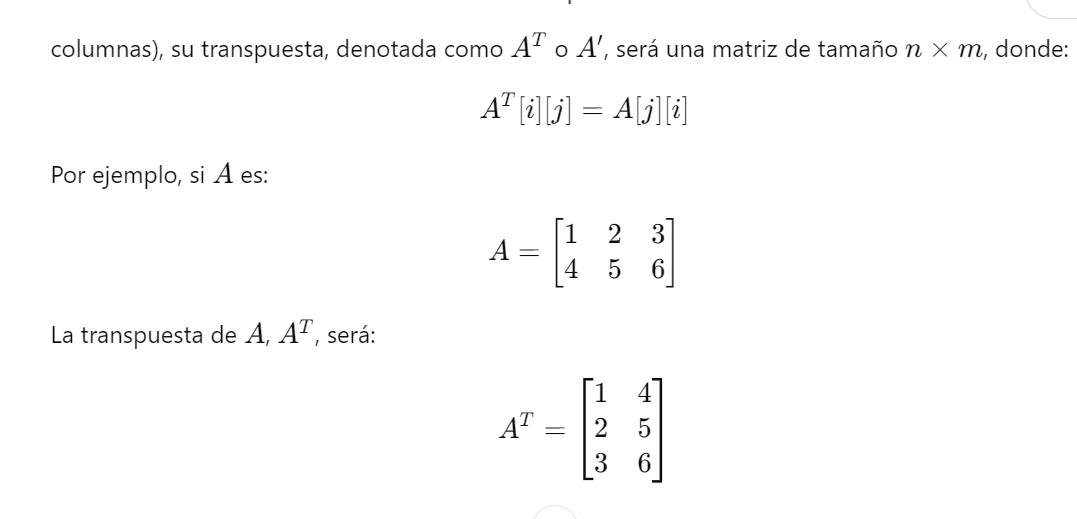

# Producto punto

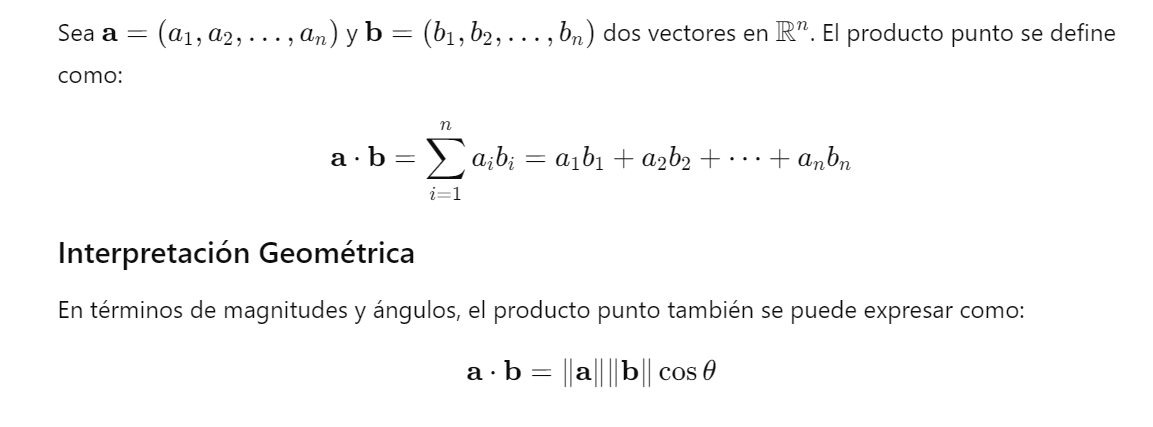


# Propiedades del producto puno
1. Conmutativa: a.b = b.a
2. linealidad: (ca).b = c(a.b)
3. distributiva: (a+c).b = (a.b) + (c.b) =b.a + b.c

In [50]:
# Sean los vectores a, b, c
import numpy as np

a = np.array([1,2,3,4])
b = np.array([4,6,2,5])
c = np.array([3,6,8,19])
res1 = np.dot((a+c),b)
res2 = np.dot(a,b) + np.dot(b,c)

print(f"(a+b).c = {res1}, (a.b)+ (c.b) = {res2}")
             

(a+b).c = 201, (a.b)+ (c.b) = 201


# Matriz triangular superior
Es aquella en la que todos los elemntos por debajo de la diagonal principal son ceros
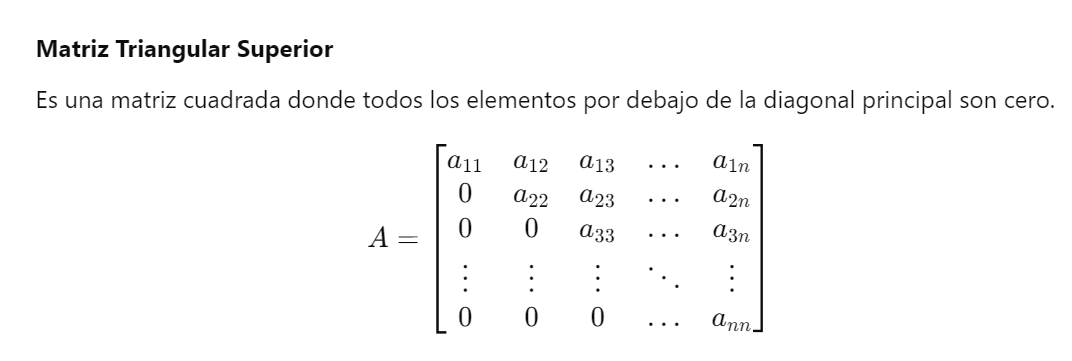

# Matriz Triangular inferior
Es aquella en la que todos los elemntos por arrba de la diagonal inferior son ceros
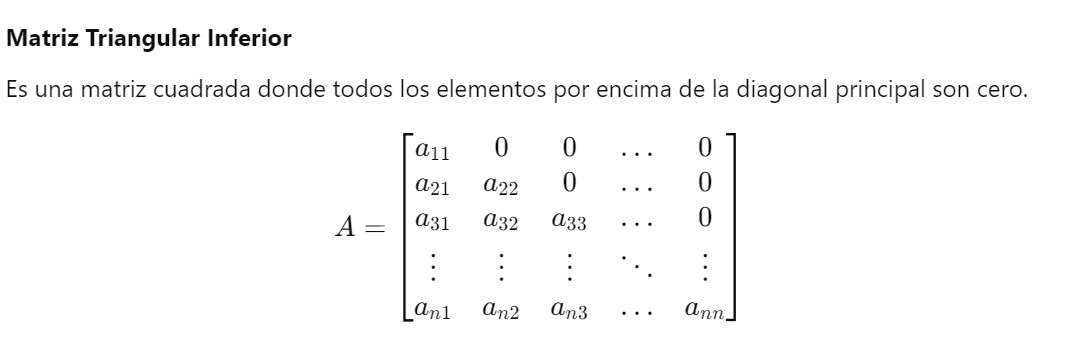


# Uso de las matrices triangulares
1. Resolucion de Sistemas lineales de Ecuaciones.
   - Si un sistema lineal tiene como matriz de coeficientes una matriz triangular (Suoerior, o inferior), se puede resolver fácilmente mediante            sustitución regresiva o progresiva.
3. Descomposición de Matrices.
   - En algebra lineal, las matrices triangulares se utilizan en descomposiciones como la LU(Matriz  L triengular inferior y U triangular superior)
     para resolver sistemas lineales, calcular determinantes y encontrar inversas.
5. ww